<a href="https://colab.research.google.com/github/DanaFilipovich/ML-intro_HomeTasks1/blob/main/Data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Поле 1: Подключение библиотек**

In [2]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **Поле 2: Загрузка данных**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Datas/train.csv"
df = pd.read_csv(path)

Mounted at /content/drive


# **Поле 3: Data quality assessment** (Оценка качества)
Проверить: пропущенные данные;
нетипичные данные – выбросы;
неинформативные данные – дубликаты;
несогласованные данные – одни и те же данных, представленны в разных регистрах или форматах.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


Значения в колонках:
*   Survived - выжил или нет  0 = Нет, 1 = Да
*   Pclass - Класс билета 1 = 1st, 2 = 2nd, 3 = 3rd
*   Name - Имя пассажира
*   Sex - пол: male female 
*   Age - Возраст в годах
*   SibSp - братья + мужья и жены
*   Parch - Родители + дети
*   Ticket - Номер билета
*   Fare - Плата за проезд
*   Cabin - Номер каюты
*   Embarked - Порт посадки на корабль (C = Cherbourg, Q = Queenstown, S = Southampton)

In [5]:
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S


In [6]:
#если NaN
df.isna().sum().sum()

76165

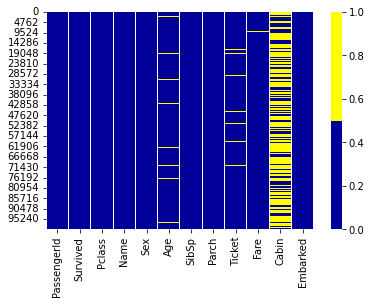

In [7]:
#тепловая карта
cols = df.columns[:12] 
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

Пропуски есть в столбцах "Age", "Ticket", "Cabin", "Fare". 

In [8]:
#какой процент они составляют по каждому признаку
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

PassengerId - 0.0%
Survived - 0.0%
Pclass - 0.0%
Name - 0.0%
Sex - 0.0%
Age - 3.292%
SibSp - 0.0%
Parch - 0.0%
Ticket - 4.623%
Fare - 0.134%
Cabin - 67.866%
Embarked - 0.25%


Исходя из анализа пропусков рекомендуется удалить признак "Cabin", так как по нему более половины пропусков. По остальным рекомендуется дополнить записи

Пропущенный возраст и стоимость заполняем средним значением

In [9]:
df['Age'].fillna(int(df['Age'].mean()), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

Пропущенные билеты заполняем "MISSING"

In [10]:
df['Ticket']= df['Ticket'].fillna('MISSING')
df['Embarked']= df['Embarked'].fillna('MISSING')

In [11]:
#удаление колонки Cabin
cols_to_drop = ['Cabin']
df=df.drop(cols_to_drop, axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,1,"Oconnor, Frankie",male,38.00,2,0,209245,27.14,S
1,1,0,3,"Bryan, Drew",male,38.00,0,0,27323,13.35,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,S


In [12]:
#проверка пропусков в процентах
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

PassengerId - 0.0%
Survived - 0.0%
Pclass - 0.0%
Name - 0.0%
Sex - 0.0%
Age - 0.0%
SibSp - 0.0%
Parch - 0.0%
Ticket - 0.0%
Fare - 0.0%
Embarked - 0.0%


Pclass - перевести в object, т.к. нет класса 1.5

In [13]:
df['Pclass'].astype('str')
df['Survived'].astype('bool')

0         True
1        False
2        False
3        False
4         True
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Name: Survived, Length: 100000, dtype: bool

Сбор статистических данных. Проверка выбросов.

По каждому числовому признаку: количество записей, среднее, стандартное отклонение, минимум, максимум, квантили.

здесь нужно привести только выборочные колонки

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,49999.500000,0.427740,2.106910,38.343770,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.009701,0.862566,0.950076,69.54218
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,38.000000,0.000000,0.000000,24.49000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.56000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [15]:
df.describe(include=['object', 'bool'])

,Name,Sex,Ticket,Embarked
count,100000,100000,100000,100000
unique,92144,2,75332,4
top,"Johnson, John",male,MISSING,S
freq,31,56114,4623,72139


Виден выброс в столбце Fare, т.к. максимальное значение 744.66, а квантиль 75% 33.5. Однако там много записей с высокой ценой, поэтому не убираем.  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


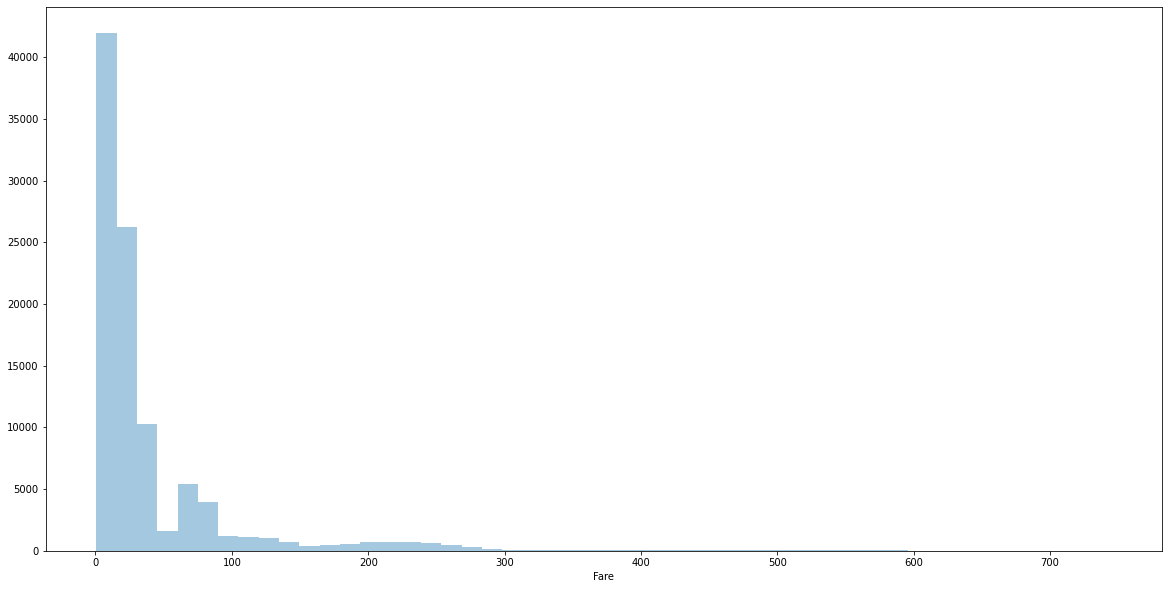

In [16]:
plt.figure(figsize=(20,10))
sns.distplot(a=df['Fare'], kde=False)

Для категориальных признаков построим столбчатые диаграммы

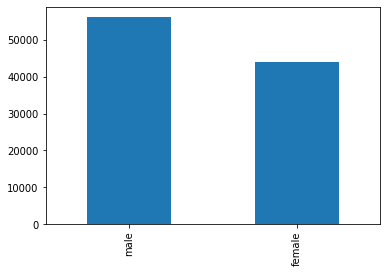

In [17]:
df['Sex'].value_counts().plot.bar()

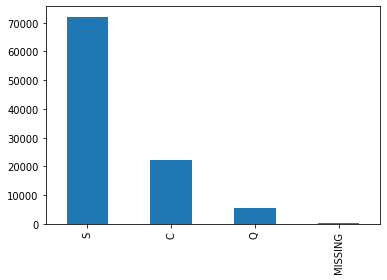

In [18]:
df['Embarked'].value_counts().plot.bar()

проверка повторений

In [19]:
df.duplicated().sum()

0

In [20]:
key = ['Name', 'Sex', 'Age', 'Ticket']

df.fillna(0).groupby(key)['PassengerId'].count().sort_values(ascending=False).head(20)

Name               Sex     Age   Ticket        
Aaberg, Melvin     male    24.0  17975             1
Owens, Crystal     female  25.0  C.A. 4097892      1
Owens, Joe         male    30.0  C.A. 15425        1
Owens, Jesus       male    48.0  29508             1
Owens, Jerry       male    38.0  32927             1
Owens, Jeffrey     male    57.0  STON/O2. 21752    1
Owens, Jean        female  14.0  393183            1
Owens, Jason       male    37.0  15946             1
Owens, Jacqueline  female  41.0  57022             1
Owens, Hugh        male    52.0  8246              1
Owens, Helen       female  55.0  27768             1
Owens, Grant       male    4.0   9241              1
Owens, Gertrude    female  42.0  C.A. 44465        1
Owens, Floyd       male    59.0  A/5 304320        1
Owens, Eric        male    34.0  STON/O 502182     1
Owens, Elvira      female  57.0  193829            1
Owens, Edwin       male    46.0  424167            1
Owens, Edward      male    66.0  24470             

Повторений не выявлено

In [21]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.001956,-0.000893,-0.002604,0.001000,0.000411,-0.001035
Survived,0.001956,1.000000,-0.289723,0.102207,-0.007587,0.023352,0.187407
Pclass,-0.000893,-0.289723,1.000000,-0.254857,-0.051436,-0.041848,-0.417084
Age,-0.002604,0.102207,-0.254857,1.000000,-0.110742,-0.123647,0.107212
SibSp,0.001000,-0.007587,-0.051436,-0.110742,1.000000,0.213126,0.059336
Parch,0.000411,0.023352,-0.041848,-0.123647,0.213126,1.000000,0.061414
Fare,-0.001035,0.187407,-0.417084,0.107212,0.059336,0.061414,1.000000


In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
sns.pairplot(df,height=4)

# **Поле 4: Data exploration** (Исследование данных) 


Количество выживших

In [22]:
df['Survived'].value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


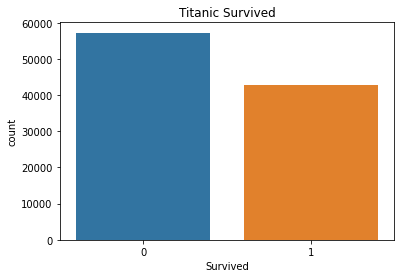

In [23]:
sns.countplot('Survived', data=df)
plt.title("Titanic Survived")
plt.show()

Процент выживших

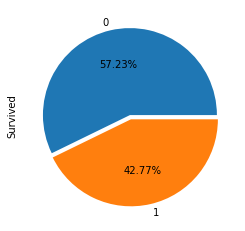

In [24]:
explode = [0, 0.05]
df['Survived'].value_counts().plot.pie(autopct = '%1.2f%%', explode=explode)

Разделение по классам

In [25]:
df['Sex'].value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


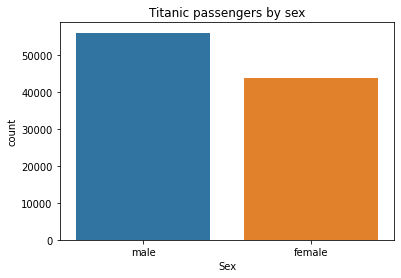

In [26]:
sns.countplot('Sex', data=df)
plt.title("Titanic passengers by sex")
plt.show()

Количество спасшихся по полу

In [36]:
df.loc[df.Survived == 1].groupby('Sex')['Sex'].count()

Sex
female    31226
male      11548
Name: Sex, dtype: int64

Количество пассажиров в каждом классе

In [ ]:
df['Pclass'].value_counts()

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


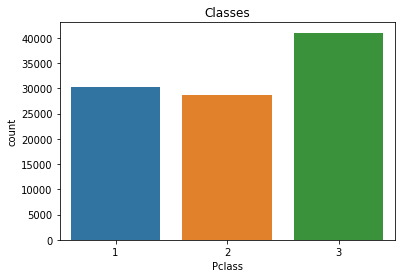

In [27]:
sns.countplot('Pclass', data=df)
plt.title("Classes")
plt.show()

In [28]:
df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0           12739
        1           17576
2       0           13622
        1           15057
3       0           30865
        1           10141
Name: Survived, dtype: int64

Средний возраст спасшихся и не выживших по классам.

In [34]:
df.groupby(['Pclass', 'Survived'])['Age'].mean().round()

Pclass  Survived
1       0           43.0
        1           46.0
2       0           38.0
        1           40.0
3       0           34.0
        1           33.0
Name: Age, dtype: float64

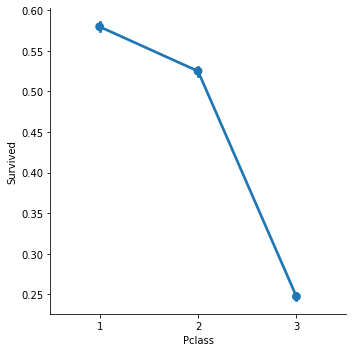

In [ ]:
sns.catplot(x='Pclass', y='Survived', data=df, kind='point')

Из данных видно, что у 1го класса количество выживших было больше. 

Стоимость билетов по полу

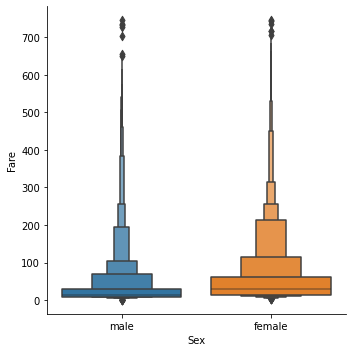

In [29]:
sns.catplot(x='Sex', y='Fare', data=df, kind='boxen')

Женщины платили за билет больше, чем мужчины. Рассмотрим возраст пассажиров. 

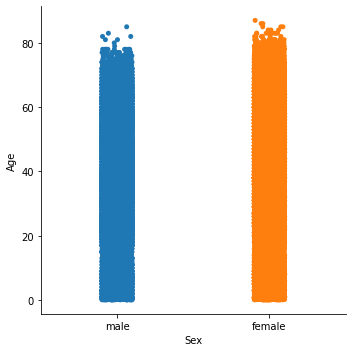

In [30]:
sns.catplot(x='Sex', y='Age', data=df)

Распределение возраста у мужчин  женщин по классам.

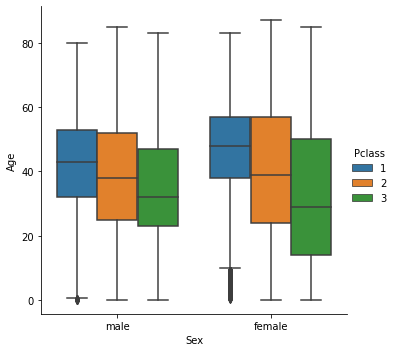

In [ ]:
sns.catplot(x='Sex', y='Age', data=df, kind='box', hue='Pclass')

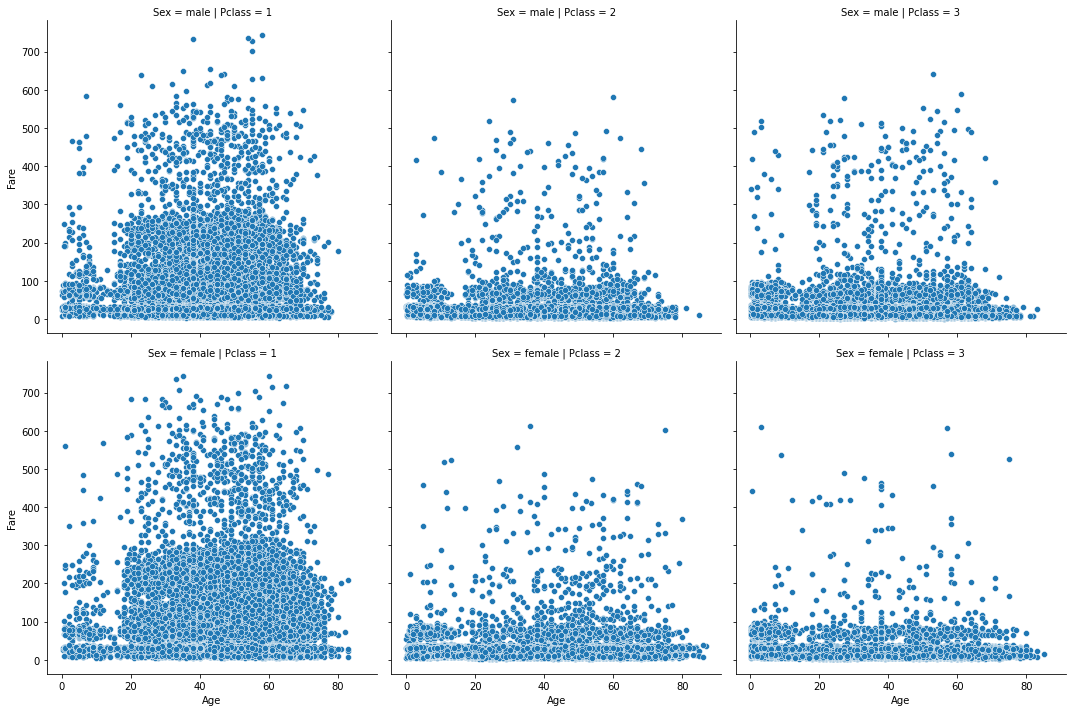

In [ ]:
sns.relplot(x='Age', y='Fare', data=df, row='Sex', col='Pclass')

Из приведенных выше графиков видно, что среди пассажиров первого класса было больше пассажиров-мужчин, чем пассажиров-женщин. Стоимость проезда для пассажиров первого класса женского пола была выше, чем для пассажиров мужского пола. Большой разницы в стоимости проезда для пассажиров второго и третьего класса нет. Немногие дети путешествовали в первом классе. В третьем классе было немного больше детей. Большинство пассажиров второго и третьего класса были в возрасте от 20 до 40 лет.

**# Summary**

Краткие выводы по проведенному анализу данных:
1. У какого пассажиров какого класса вероятность была выше? - У первого. 
2. У лиц какого пола вероятность выжить была выше? - У женщин. 
3. Вероятность остаться в живых у лиц молодого возраста выше, чем у пожилого? - Нет. 

